# Laboratorio 1

Nicolas Morales Galindo

Juan Sebastian Sanchez

Importacion de datos desde google Drive

## Ejercicio 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'year': [
        2010, 2011, 2012,
        2010, 2011, 2012,
        2010, 2011, 2012
    ],
    'team': [
        'FCBarcelona', 'FCBarcelona',
        'FCBarcelona','RMadrid',
        'RMadrid', 'RMadrid',
        'ValenciaCF', 'ValenciaCF',
        'ValenciaCF'
    ],
    'wins': [30, 28 ,32, 29,32,26,21,17,19],
    'draws': [6, 7, 4,5,4,7,8,10,8],
    'losses': [2,3,2,4,2,5,9,11,11],
    }

football = pd.DataFrame(data, columns = ['year', 'team', 'wins', 'draws', 'losses'])
print(football)


   year         team  wins  draws  losses
0  2010  FCBarcelona    30      6       2
1  2011  FCBarcelona    28      7       3
2  2012  FCBarcelona    32      4       2
3  2010      RMadrid    29      5       4
4  2011      RMadrid    32      4       2
5  2012      RMadrid    26      7       5
6  2010   ValenciaCF    21      8       9
7  2011   ValenciaCF    17     10      11
8  2012   ValenciaCF    19      8      11


## Ejercicio 2

In [ ]:
edu = pd.read_csv('/content/educ_figdp_1_Data.csv',
                  na_values = ':',
usecols = ["TIME","GEO","Value"])

edu.head(2)


,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN


In [ ]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [ ]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [ ]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [ ]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [ ]:
edu.loc[90:94, ['TIME','GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [ ]:
edu[edu['Value'] > 6.5 ].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [ ]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [ ]:
edu.max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [ ]:
print("Pandas max function:", edu['Value'].max())
print("Python max function:", max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


In [ ]:
s = edu["Value"]/100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [ ]:
s= edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [ ]:
s = edu['Value'].apply(lambda d: d**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [ ]:
edu['valueNorm'] = edu['Value']/edu['Value'].max()
edu.tail()

,TIME,GEO,Value,valueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [ ]:
edu.drop('valueNorm', axis=1, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [ ]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [ ]:
edu.loc[len(edu.index)] = [2000, 5.00, 'a']

edu.tail()

,TIME,GEO,Value
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,5.0,a
385,2000,5.0,a


In [ ]:
edu.drop(max(edu.index), axis = 0, inplace = True)

edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.1
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,5.0,a


In [ ]:
eduDrop = edu.drop(edu[edu["Value"].isnull()].index, axis = 0)
eduDrop.head()


,TIME,GEO,Value
2,2002,European Union (28 countries),5.0
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [ ]:
eduDrop = edu.dropna(how = "any", subset = ["Value"])
eduDrop. head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [ ]:
eduFilled = edu.fillna(value = {"Value": 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [ ]:
edu.sort_values(by = "Value", ascending = False ,inplace = True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [ ]:
edu.sort_index( axis = 0, ascending = True , inplace = True)

edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [ ]:
group = edu[["GEO", "Value"]].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [ ]:
filtered_data = edu[edu["TIME"] > 2005]

pivedu = pd.pivot_table( filtered_data , values = "Value",
index = ["GEO"] ,
columns = ["TIME"])

pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [ ]:
pivedu.loc[[ "Spain","Portugal"], [2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


In [ ]:
pivedu = pivedu.drop([

"Euro area (13 countries)",
"Euro area (15 countries)",
"Euro area (17 countries)",
"Euro area (18 countries)",
"European Union (25 countries)",
"European Union (27 countries)",
"European Union (28 countries)"
] ,
axis = 0)

pivedu = pivedu.rename(index = {"Germany ( until 1990 former territory of the FRG)": "Germany"})
pivedu = pivedu.dropna()
pivedu.rank( ascending = False , method = "first").head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [ ]:
totalSum = pivedu.sum(axis = 1)

totalSum.rank( ascending = False , method = "dense").sort_values(). head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

<Axes: title={'center': 'Total Values for Country'}, xlabel='GEO'>

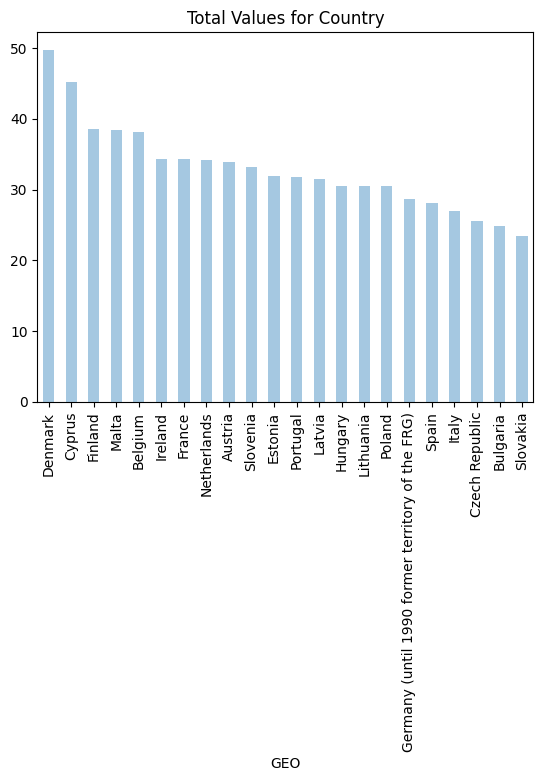

In [ ]:
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)

totalSum.plot( kind = 'bar', style = 'b', alpha = 0.4,
                title = 'Total Values for Country')

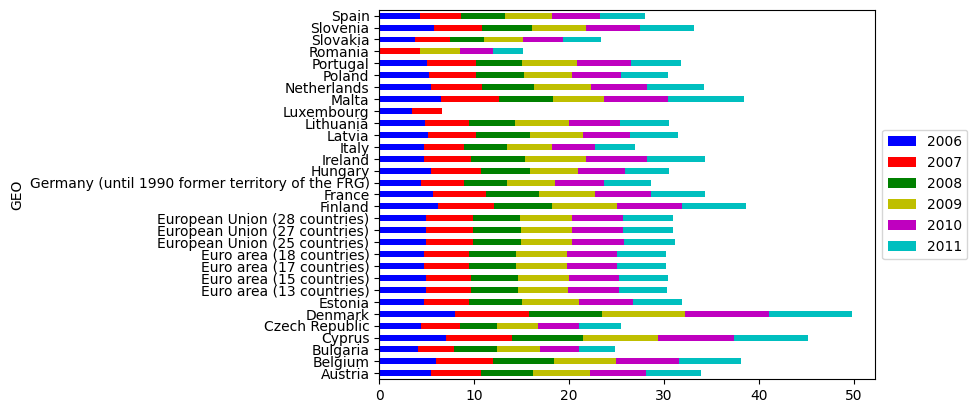

In [ ]:
my_colors = ["b", "r", "g", "y", "m", "c"]
ax = pivedu. plot ( kind = "barh",
                    stacked = True ,
                    color = my_colors)

ax.legend(loc = "center left", bbox_to_anchor = (1, .5))